# Linear Regression (The Implementation)

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Loading Training Data

In [ ]:
data = pd.read_csv("https://raw.githubusercontent.com/Guhan-B/The-Machine-Learning-Repository/refs/heads/main/datasets/restaurant_profit.csv")

X_train = data[["Population"]].values
y_train = data["Profit"].values

print ('The shape of X_train is:', X_train.shape)
print ('The shape of y_train is: ', y_train.shape)

The shape of X_train is: (97, 1)
The shape of y_train is:  (97,)


#### Defining Model Implementation

In [3]:
class LinearRegression:
    def __init__(self, max_iter=500, learning_rate=0.01, tol=0.0001, regularization=None, alpha=1.0, beta=0.5):
        # Trainable Parameters
        self.coef = None
        self.intercept = None
        
        # Hyper Parameters
        self.max_iter = max_iter
        self.learning_rate = learning_rate
        self.tol = tol
        self.regularization = regularization
        self.alpha=alpha
        self.beta=beta
        
        # History
        self.history = { "MSE" : [], "coef" : [], "intercept" : [] }
    
    def fit(self, X, y):
        # Dimensionality of the data
        self.n_samples = X.shape[0]
        self.n_features = X.shape[1]
        
        # Initial values for trainable parameters
        self.coef = np.zeros(self.n_features)
        self.intercept = 0.0
        
        # The training process (Using gradient descent)
        for i in range(self.max_iter):
            # STEP 1: Making predictions & computer error
            y_pred = np.dot(X, self.coef) + self.intercept
            error = LinearRegression.__compute_error(y, y_pred)
            
            # STEP 2: Stopping condition
            if (len(self.history["MSE"]) > 0 and (self.history["MSE"][-1] - error) <= self.tol):
                break
            
            # STEP 3: Updating history
            self.history["MSE"].append(error)
            self.history["coef"].append(self.coef)
            self.history["intercept"].append(self.intercept)
            
            # STEP 4: Computing gradients
            delta_coef, delta_intercept = LinearRegression.__compute_gradients(
                X, 
                y, 
                y_pred, 
                self.n_samples
            )
            
            # STEP 5: Compute regularization
            reduction = 0
            
            if self.regularization == "L1":
                reduction = self.learning_rate * self.alpha * np.sign(self.coef)
            if self.regularization == "L2":
                reduction = 2.0 * self.learning_rate * self.alpha *  self.coef
            if self.regularization == "ElasticNet":
                reduction = self.learning_rate * self.alpha * ((1.0 - self.beta) * np.sign(self.coef) + self.beta * 2.0 * self.coef)
                
            # STEP 5: Updating trainable parameters
            self.coef = self.coef - self.learning_rate * delta_coef - reduction
            self.intercept = self.intercept - self.learning_rate * delta_intercept             
            
        return self
    
    def predict(self, X):
        return np.dot(X, self.coef) + self.intercept
    
    def score(self, X, y):
        y_pred = self.predict(X)
        return LinearRegression.__compute_error(y, y_pred)
    
    # Mean Squared Error
    @staticmethod
    def __compute_error(y_true, y_pred):
        return np.mean(np.square(np.subtract(y_pred, y_true))) / 2.0
    
    @staticmethod
    def __compute_gradients(X, y_true, y_pred, n_samples):
        delta_coef = np.dot(X.T, y_pred - y_true) / n_samples
        delta_intercept = np.mean(y_pred - y_true)
        return delta_coef, delta_intercept

### Training Model

In [4]:
model = LinearRegression(max_iter=1500, learning_rate=0.01, tol=0.0001, regularization="L2").fit(X_train, y_train)

print('Model coefficients:', model.coef)
print('Model intercept: ', model.intercept)
print('Model MSE: ', model.score(X_train, y_train))

y_pred = model.predict(X_train)

Model coefficients: [1.03108683]
Model intercept:  -2.533379902712186
Model MSE:  4.672171150772861


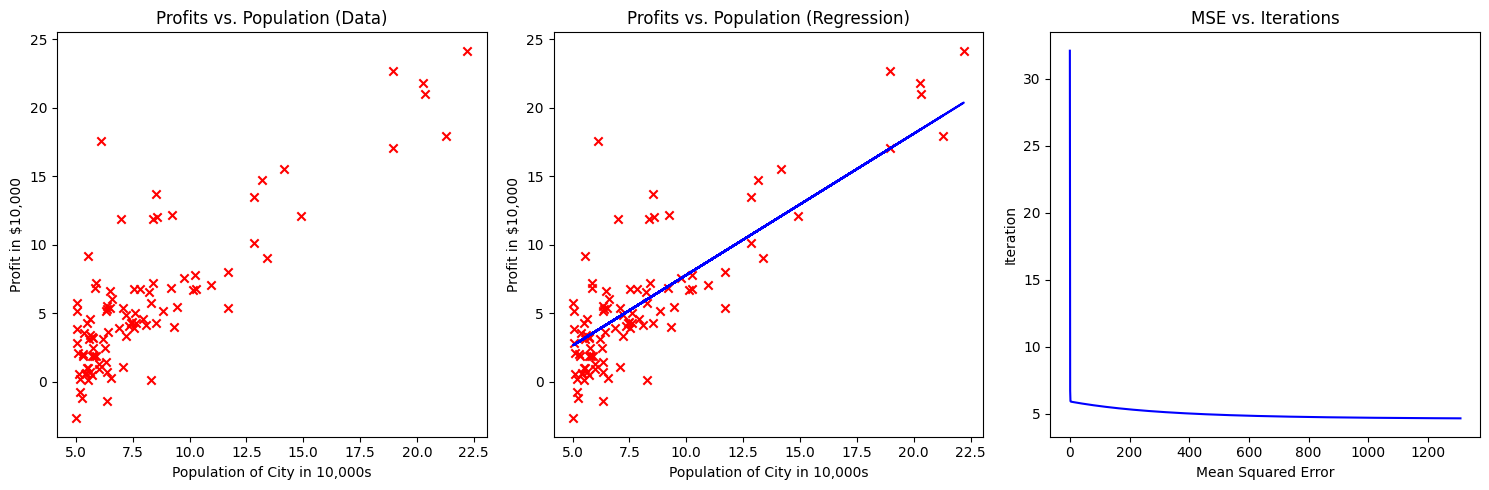

In [5]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))

axes[0].scatter(X_train, y_train, marker='x', c='r') 
axes[0].set_title('Profits vs. Population (Data)')
axes[0].set_xlabel('Population of City in 10,000s')
axes[0].set_ylabel('Profit in $10,000')

axes[1].plot(X_train, y_pred, c='b')
axes[1].scatter(X_train, y_train, marker='x', c='r') 
axes[1].set_title('Profits vs. Population (Regression)')
axes[1].set_xlabel('Population of City in 10,000s')
axes[1].set_ylabel('Profit in $10,000')

axes[2].plot(range(len(model.history['MSE'])), model.history['MSE'], c='b')
axes[2].set_title('MSE vs. Iterations')
axes[2].set_xlabel('Mean Squared Error')
axes[2].set_ylabel('Iteration')

plt.tight_layout()

plt.show()

### Visualizing The Cost Function (MSE)

In [6]:
start, end, step = -500, 500, 5

coeff_s, intercept_s, cost_s = np.arange(start, end, step), np.arange(start, end, step), []

X =np.random.randn(1000,1)  
y = X * np.random.randn() + np.random.randn() + (np.random.randn(1000,1) * 0.09)

def MSE(y_true, y_pred):
    return np.mean(np.square(y_pred - y_true)) / 2.0

for coeff in coeff_s:
    for intercept in intercept_s:
        cost_s.append(MSE(X * coeff + intercept, y))

cost_s = np.array(cost_s).reshape(len(coeff_s), len(intercept_s))

In [7]:
import plotly.graph_objects as go

figure = go.Figure(data=go.Surface(z=cost_s, x=coeff_s, y=intercept_s))

figure.update_traces(
    contours_z=dict(
        show=True, 
        usecolormap=True,
        highlightcolor="white",
        project_z=True
    )
)

figure.update_layout(
    width=800,
    height=800,
)

figure.update_scenes(
    xaxis_title_text='Coeffecient',  
    yaxis_title_text='Intercept',  
    zaxis_title_text='Cost (MSE)'
)

figure.show()